In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

In [2]:
df = pd.read_csv("PGA_Data_Historical.csv")

In [3]:
df.head()

,Player Name,Season,Statistic,Variable,Value
0,Robert Garrigus,2010,Driving Distance,Driving Distance - (ROUNDS),71
1,Bubba Watson,2010,Driving Distance,Driving Distance - (ROUNDS),77
2,Dustin Johnson,2010,Driving Distance,Driving Distance - (ROUNDS),83
3,Brett Wetterich,2010,Driving Distance,Driving Distance - (ROUNDS),54
4,J.B. Holmes,2010,Driving Distance,Driving Distance - (ROUNDS),100


In [4]:
# Calculate the number of unique authors in the DataFrame
player_count = len(df["Player Name"].unique())

# Calculate the earliest/latest year a book was published
earliest_year = df["Season"].min()
latest_year = df["Season"].max()

In [5]:
 # Place all of the data found into a summary DataFrame
summary_table = pd.DataFrame({"Total Unique Players": [player_count],
                              "Earliest Year": earliest_year,
                              "Latest Year": latest_year})
summary_table

,Total Unique Players,Earliest Year,Latest Year
0,3053,2010,2018


In [6]:
df.count()

Player Name    2740403
Season         2740403
Statistic      2740403
Variable       2740403
Value          2696905
dtype: int64

In [7]:
df = df.dropna()
df.count()

Player Name    2696905
Season         2696905
Statistic      2696905
Variable       2696905
Value          2696905
dtype: int64

In [8]:
driving_distance_player = df[df['Variable'] == 'Driving Distance - (AVG.)']
driving_distance_player.head(5)

,Player Name,Season,Statistic,Variable,Value
192,Robert Garrigus,2010,Driving Distance,Driving Distance - (AVG.),315.5
193,Bubba Watson,2010,Driving Distance,Driving Distance - (AVG.),309.8
194,Dustin Johnson,2010,Driving Distance,Driving Distance - (AVG.),308.5
195,Brett Wetterich,2010,Driving Distance,Driving Distance - (AVG.),307.3
196,J.B. Holmes,2010,Driving Distance,Driving Distance - (AVG.),307.2


In [9]:
driving_distance_player = driving_distance_player.astype({'Value':'float32'})


In [10]:
driving_distance_yr = driving_distance_player.groupby('Season', as_index=False).Value.mean()
driving_distance_yr

,Season,Value
0,2010,287.513550
1,2011,291.089783
2,2012,290.053925
3,2013,287.921661
4,2014,290.016937
5,2015,290.301086
6,2016,290.898926
7,2017,292.570007
8,2018,296.636261


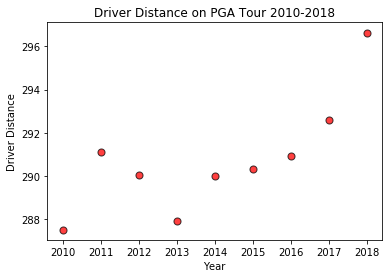

In [11]:
values = driving_distance_yr['Value']
y_axis = driving_distance_yr['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=50, alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Driver Distance')
plt.title('Driver Distance on PGA Tour 2010-2018')
plt.savefig('driver_distance_year.png')
plt.show()

In [12]:
driving_distance_player['Value'].mean()

290.8074035644531

In [13]:
driving_accuracy = df[df['Variable'] == 'Driving Accuracy Percentage - (%)']
driving_accuracy.head(5)


,Player Name,Season,Statistic,Variable,Value
960,Omar Uresti,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (%),76.08
961,Joe Durant,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (%),75.94
962,Brian Gay,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (%),74.00
963,Tim Clark,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (%),73.72
964,Craig Bowden,2010,Driving Accuracy Percentage,Driving Accuracy Percentage - (%),72.86


In [14]:
driving_accuracy = driving_accuracy.astype({'Value':'float32'})

In [15]:
driving_accuracy_yr = driving_accuracy.groupby('Season', as_index=False).Value.mean()
driving_accuracy_yr = driving_accuracy_yr.rename(columns={'Value':'Drive Accuracy (%)'})
driving_accuracy_yr

,Season,Drive Accuracy (%)
0,2010,63.366978
1,2011,61.787472
2,2012,61.029423
3,2013,61.292000
4,2014,61.550396
5,2015,61.865597
6,2016,60.226215
7,2017,60.327896
8,2018,61.488651


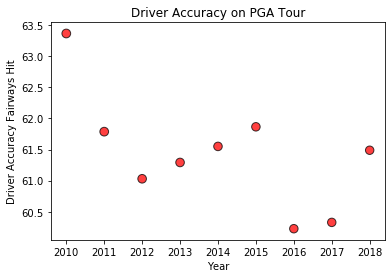

In [16]:
values = driving_accuracy_yr['Drive Accuracy (%)']
y_axis = driving_accuracy_yr['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Driver Accuracy Fairways Hit')
plt.title('Driver Accuracy on PGA Tour')
plt.savefig('driver_accuracy_year.png')
plt.show()

In [17]:
putting_accuracy = df[df['Variable'] == 'Putting Average - (AVG)']
putting_accuracy.head(5)

,Player Name,Season,Statistic,Variable,Value
2688,Brandt Snedeker,2010,Putting Average,Putting Average - (AVG),1.710
2689,Aaron Baddeley,2010,Putting Average,Putting Average - (AVG),1.735
2690,Brian Gay,2010,Putting Average,Putting Average - (AVG),1.735
2691,Carl Pettersson,2010,Putting Average,Putting Average - (AVG),1.736
2692,J.P. Hayes,2010,Putting Average,Putting Average - (AVG),1.738


In [18]:
putting_accuracy = putting_accuracy.astype({'Value':'float32'})

In [19]:
putting_accuracy_yr = putting_accuracy.groupby('Season', as_index=False).Value.mean()
putting_accuracy_yr

,Season,Value
0,2010,1.783089
1,2011,1.780215
2,2012,1.780005
3,2013,1.781494
4,2014,1.776531
5,2015,1.770375
6,2016,1.773346
7,2017,1.773847
8,2018,1.770016


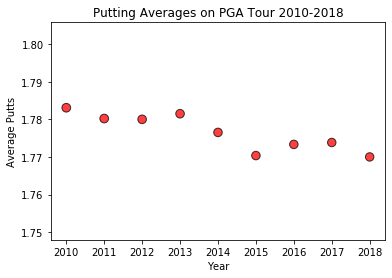

In [20]:
values = putting_accuracy_yr['Value']
y_axis = putting_accuracy_yr['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Average Putts')
plt.title('Putting Averages on PGA Tour 2010-2018')
plt.savefig('putting.png')
plt.show()

In [21]:
birdie_avg = df[df['Variable'] == 'Birdie Average - (AVG)']
birdie_avg.head(5)

,Player Name,Season,Statistic,Variable,Value
25357,Tom Gillis,2010,Birdie Average,Birdie Average - (AVG),4.06
25358,Paul Stankowski,2010,Birdie Average,Birdie Average - (AVG),4.03
25359,Chris Couch,2010,Birdie Average,Birdie Average - (AVG),4.02
25360,Nick Watney,2010,Birdie Average,Birdie Average - (AVG),4.01
25361,Matt Every,2010,Birdie Average,Birdie Average - (AVG),4.00


In [22]:
birdie_avg = birdie_avg.astype({'Value':'float32'})

In [23]:
birdie_avg_yr = birdie_avg.groupby('Season', as_index=False).Value.mean()
birdie_avg_yr

,Season,Value
0,2010,3.511042
1,2011,3.515484
2,2012,3.447173
3,2013,3.442945
4,2014,3.468192
5,2015,3.612935
6,2016,3.522541
7,2017,3.544684
8,2018,3.645285


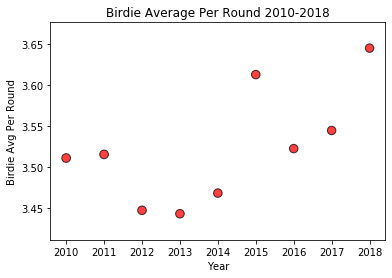

In [24]:
values = birdie_avg_yr['Value']
y_axis = birdie_avg_yr['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Birdie Avg Per Round')
plt.title('Birdie Average Per Round 2010-2018')
plt.savefig('birdie_avg.png')
plt.show()

In [25]:
green_regulation = df[df['Variable'] == 'Greens in Regulation Percentage - (%)']
green_regulation.head(5)

,Player Name,Season,Statistic,Variable,Value
1728,John Senden,2010,Greens in Regulation Percentage,Greens in Regulation Percentage - (%),72.49
1729,Kevin Sutherland,2010,Greens in Regulation Percentage,Greens in Regulation Percentage - (%),71.96
1730,Joe Durant,2010,Greens in Regulation Percentage,Greens in Regulation Percentage - (%),71.95
1731,Charles Warren,2010,Greens in Regulation Percentage,Greens in Regulation Percentage - (%),71.74
1732,Troy Matteson,2010,Greens in Regulation Percentage,Greens in Regulation Percentage - (%),71.43


In [26]:
green_regulation = green_regulation.astype({'Value':'float32'})

In [27]:
green_regulation_yr = green_regulation.groupby('Season', as_index=False).Value.mean()
green_regulation_yr

,Season,Value
0,2010,66.908333
1,2011,65.520859
2,2012,64.883873
3,2013,64.991386
4,2014,64.975143
5,2015,66.291519
6,2016,65.556435
7,2017,65.350891
8,2018,66.388031


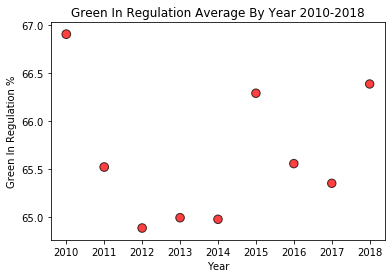

In [28]:
values = green_regulation_yr['Value']
y_axis = green_regulation_yr['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Year')
plt.ylabel('Green In Regulation %')
plt.title('Green In Regulation Average By Year 2010-2018')
plt.savefig('green_in_reg_year.png')
plt.show()

In [29]:
dustin_johnson_ac = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Dustin Johnson']

In [30]:
dustin_johnson = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Dustin Johnson']

In [31]:
dustin_johnson = dustin_johnson.astype({'Value':'float32'})


In [32]:
dustin = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Dustin Johnson']
dustin_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Dustin Johnson']

In [33]:
rory = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Rory McIlroy']
rory_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Rory McIlroy']

In [34]:
brooks = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Brooks Koepka']
brooks_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Brooks Koepka']

In [35]:
thomas = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Justin Thomas']
thomas_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Justin Thomas']

In [36]:
rahm = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Jon Rahm']
rahm_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Jon Rahm']

In [37]:
rose = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Justin Rose']
rose_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Justin Rose']

In [38]:
na = driving_distance_player.loc[driving_distance_player['Player Name'] == 'Kevin Na']
na_acc = driving_accuracy.loc[driving_accuracy['Player Name'] == 'Kevin Na']

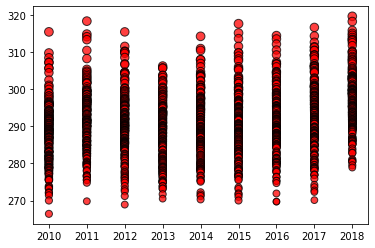

In [39]:
values = driving_distance_player['Value']
y_axis = driving_distance_player['Season']

plt.scatter(y_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)

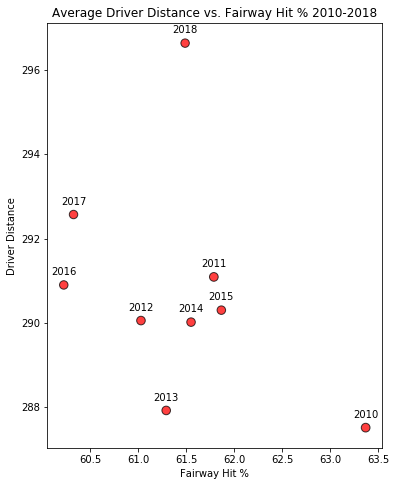

In [40]:
 # Add the linear regression equation and line to plot
values = driving_distance_yr['Value']
x_axis = driving_accuracy_yr['Drive Accuracy (%)']
year = driving_distance_yr['Season']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, values)
regress_values = values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
for x,y,z in zip(x_axis, values, year):
    label = format(z)
    plt.annotate(label,
                (x,y),
                textcoords="offset points",
                xytext=(0,10),
                ha='center')
plt.xlabel('Fairway Hit %')
plt.ylabel('Driver Distance')
plt.title('Average Driver Distance vs. Fairway Hit % 2010-2018')
plt.subplots_adjust(top=1.6)
plt.savefig('drive_distance_fairway_by_year.png')
plt.show()


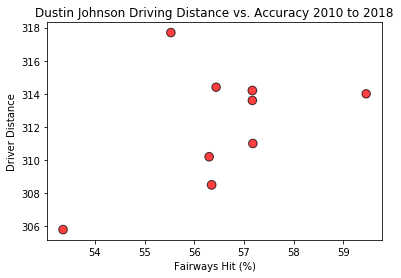

In [41]:
 # Add the linear regression equation and line to plot
values = dustin['Value']
x_axis = dustin_acc['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, values)
regress_values = values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Fairways Hit (%)')
plt.ylabel('Driver Distance')
plt.title('Dustin Johnson Driving Distance vs. Accuracy 2010 to 2018')
plt.savefig('dustin_johnson_driver.png')
plt.show()

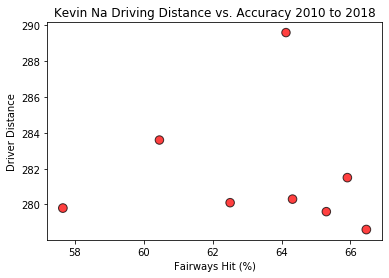

In [42]:
 # Add the linear regression equation and line to plot
values = na['Value']
x_axis = na_acc['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, values)
regress_values = values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Fairways Hit (%)')
plt.ylabel('Driver Distance')
plt.title('Kevin Na Driving Distance vs. Accuracy 2010 to 2018')
plt.savefig('kevin_na_driver.png')
plt.show()

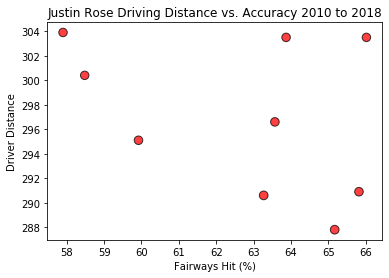

In [43]:
 # Add the linear regression equation and line to plot
values = rose['Value']
x_axis = rose_acc['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, values)
regress_values = values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Fairways Hit (%)')
plt.ylabel('Driver Distance')
plt.title('Justin Rose Driving Distance vs. Accuracy 2010 to 2018')
plt.show()

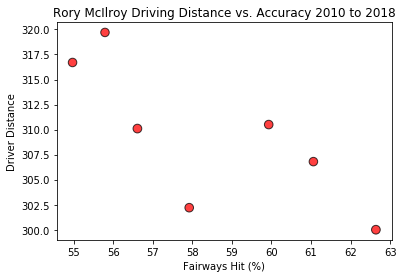

In [44]:
 # Add the linear regression equation and line to plot
values = rory['Value']
x_axis = rory_acc['Value']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, values)
regress_values = values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, values, marker = "o", facecolors = "red", edgecolors= "black",
           s=driving_accuracy['Value'], alpha=0.75)
plt.xlabel('Fairways Hit (%)')
plt.ylabel('Driver Distance')
plt.title('Rory McIlroy Driving Distance vs. Accuracy 2010 to 2018')
plt.savefig('rory_mcilroy_driver.png')
plt.show()